In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic as bin_mean
from scipy.interpolate import make_interp_spline

rawData=pd.read_csv("./Average_data.csv")
qs = np.unique(rawData['q'])
dataSets = []
max_ps = 0
for q in qs:
    print(q)
    data = rawData.loc[rawData['q'] == q]
    dataSets.append(data)


2
3
4
5


In [46]:
def metric(c_in, c_out,c):
    return (c_in-c_out)/c

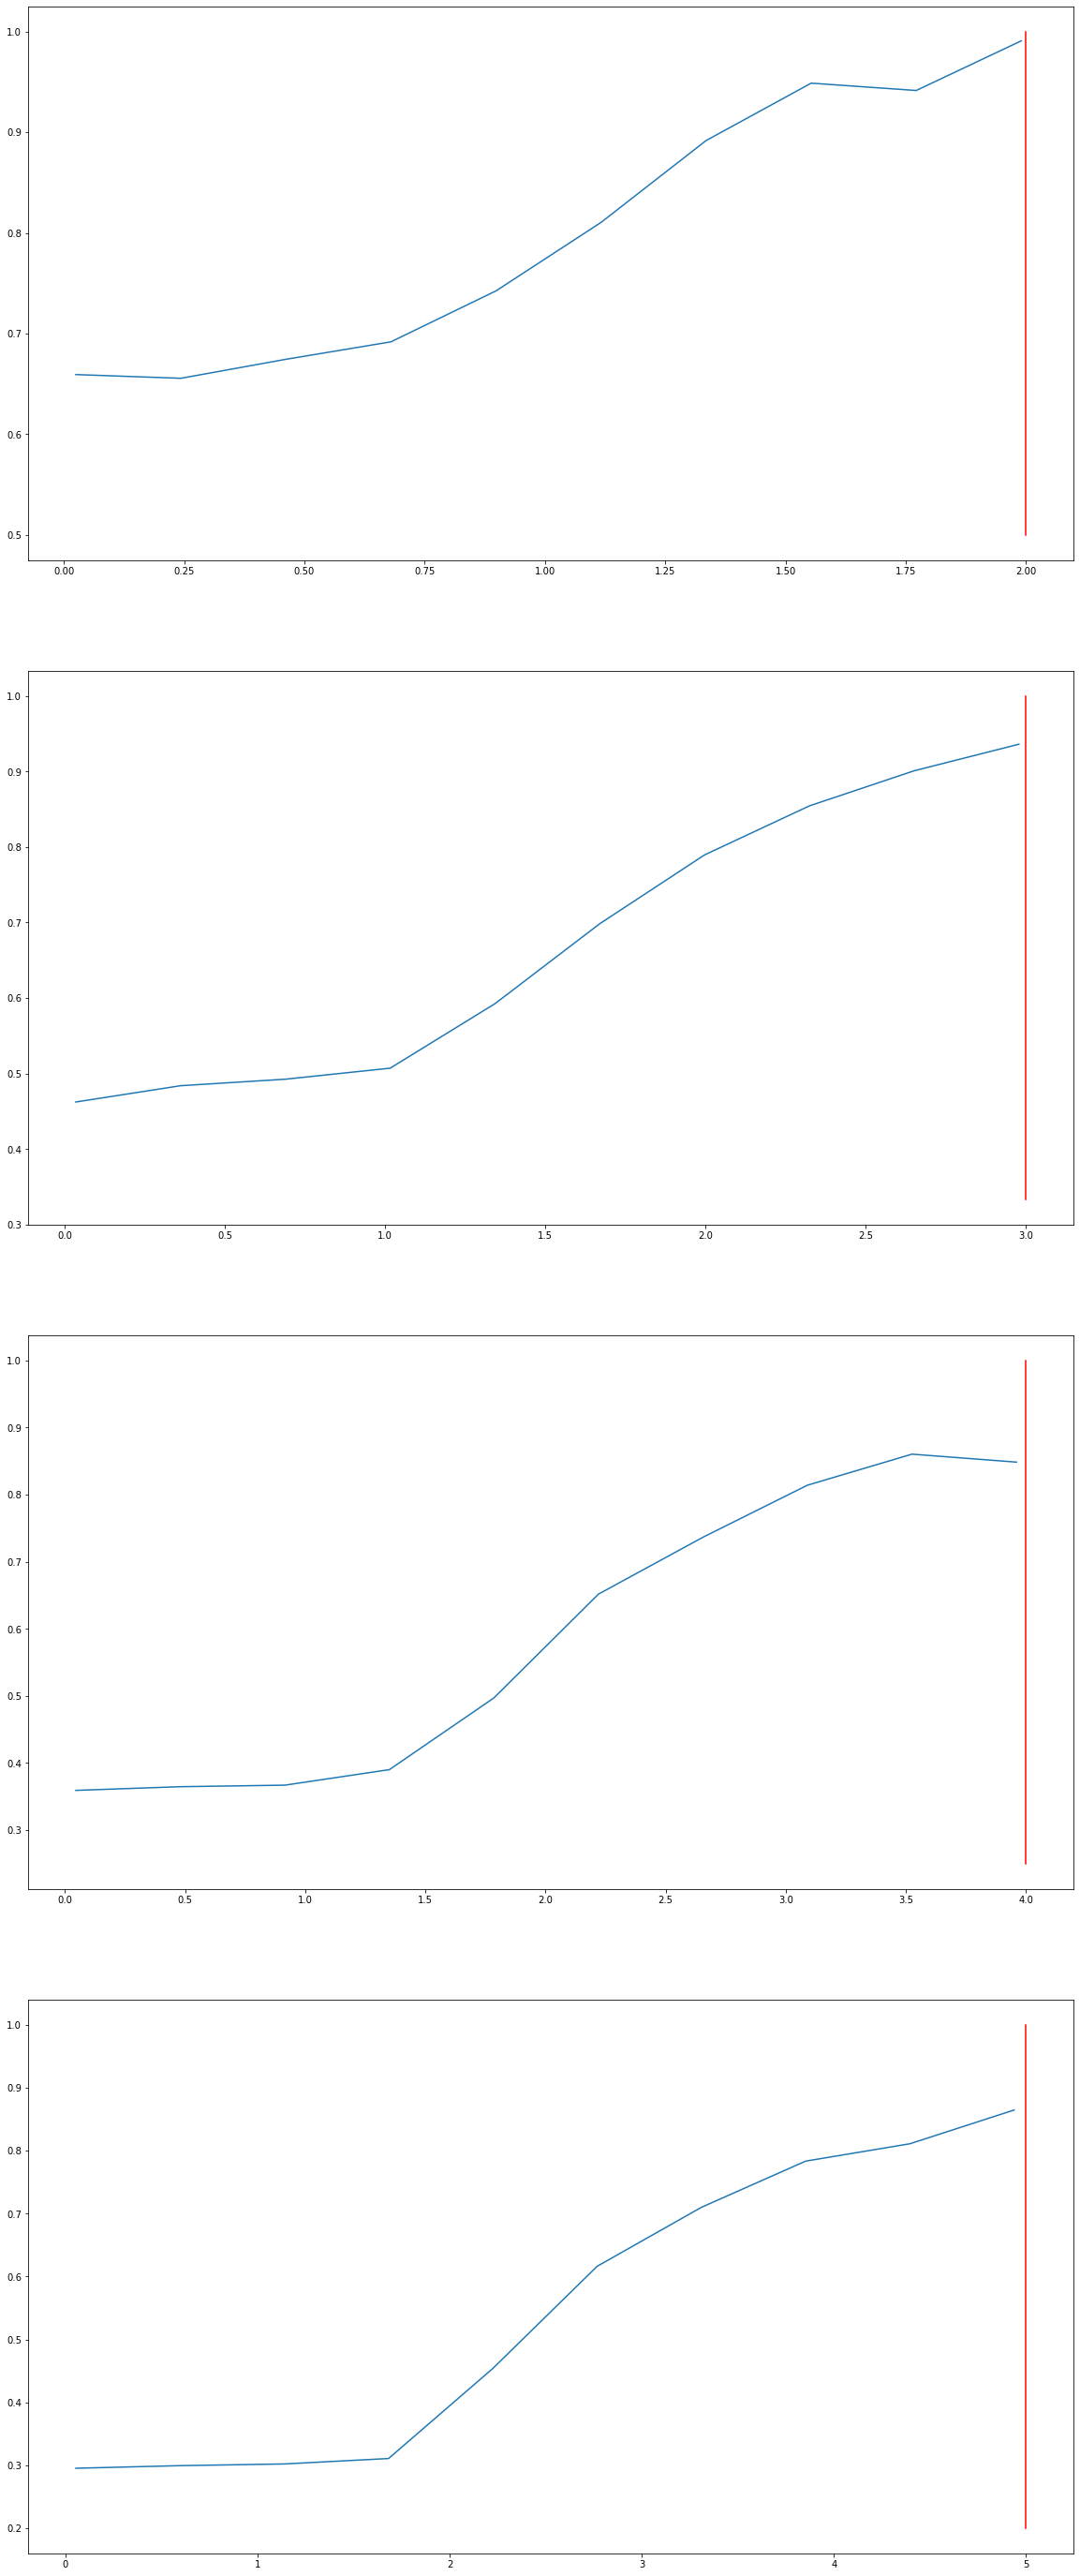

In [47]:
fig,ax = plt.subplots(qs.shape[0],figsize = (20,50))

for i,df in enumerate(dataSets):
    xs = []
    ys = []
    
    
    for index,row in df.iterrows():
        c_in = row['n'] * row['p_in']
        c_out = row['n'] * row['p_out']

        c = (c_in +(row['q'] -1)*c_out) / row['q']

        repeat_xs = []
        repeat_ys = []
        for s in ['1','2','3','4','5']:
            repeat_ys.append(row[s])

        xs.append(metric(c_in,c_out,c))
        ys.append(np.max(repeat_ys))

    k_s = row['q']

    means,edges,_ = bin_mean(xs,ys,bins=100)
    ys = means
    xs = edges[1::]

    X_Y_spline = make_interp_spline(xs,ys)
    xs = np.linspace(xs.min(), xs.max(),10)
    ys = X_Y_spline(xs)


    ax[i].plot(xs,ys)
    ax[i].plot([k_s,k_s],[1 / row['q'],1],c='r')


